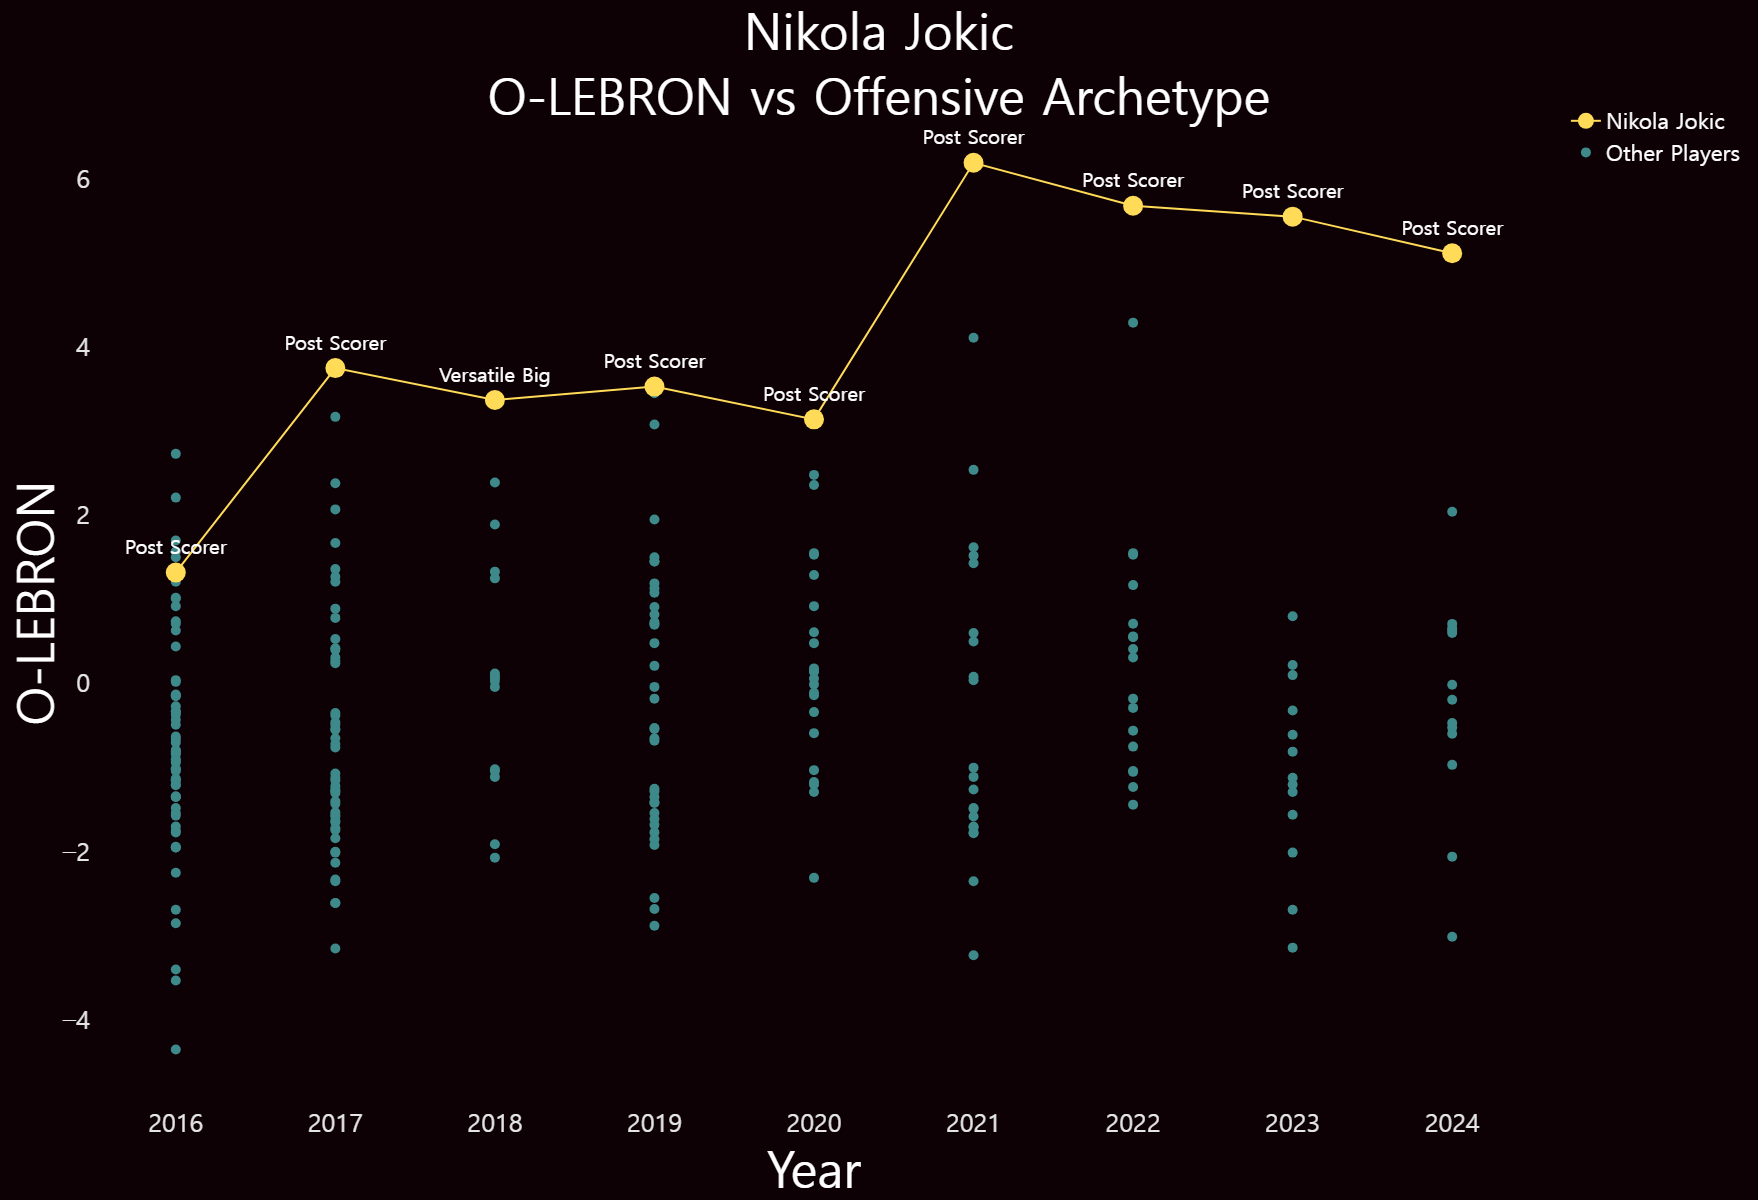

In [1]:
import plotly.graph_objects as go

import pandas as pd
import random
import numpy as np
import json
def full_name(team):
    team_dict = {'ATL': 'Atlanta Hawks',
     'BOS': 'Boston Celtics',
     'CLE': 'Cleveland Cavaliers',
     'NOP': 'New Orleans Pelicans',
     'CHI': 'Chicago Bulls',
     'DAL': 'Dallas Mavericks',
     'DEN': 'Denver Nuggets',
     'GSW': 'Golden State Warriors',
     'HOU': 'Houston Rockets',
     'LAC': 'Los Angeles Clippers',
     'LAL': 'Los Angeles Lakers',
     'MIA': 'Miami Heat',
     'MIL': 'Milwaukee Bucks',
     'MIN': 'Minnesota Timberwolves',
     'BRK': 'Brooklyn Nets',
     'NYK': 'New York Knicks',
     'ORL': 'Orlando Magic',
     'IND': 'Indiana Pacers',
     'PHI': 'Philadelphia 76ers',

     'PHO': 'Phoenix Suns',
     'POR': 'Portland Trail Blazers',
     'SAC': 'Sacramento Kings',
     'SAS': 'San Antonio Spurs',
     'OKC': 'Oklahoma City Thunder',
     'TOR': 'Toronto Raptors',
     'UTA': 'Utah Jazz',
     'MEM': 'Memphis Grizzlies',
     'WAS': 'Washington Wizards',
     'DET': 'Detroit Pistons',
     'CHA': 'Charlotte Hornets'}
    return team_dict[team.upper()]
def player_trend(player,graphtype='d', role = True):

    df = pd.read_csv('lebron.csv')
    
    
    old =df[df.year<2014].reset_index(drop=True)
    new= df[df.year>2013].reset_index(drop=True)
    old['Defensive Role'] = old['Pos']

    df = pd.concat([old,new]).reset_index(drop=True)

    # Create the scatter plot
    fig = go.Figure()
    
    df['year'] =df['year'].astype(int)
    
    pdf = df[df.Player.str.lower().str.contains(player.lower())].reset_index(drop=True)

    start_year = pdf['year'].min()
 
    end_year=pdf['year'].max()
    if graphtype =='d':
        unit = 'D-LEBRON'
        prole = 'Defensive Role'
    elif graphtype =='t':
        unit = 'LEBRON'
        prole = 'Pos'
        
    elif graphtype =='o':
        unit='O-LEBRON'
        prole = 'Offensive Archetype'
    
    pos = prole
    pos_type = prole
    if  graphtype=='t':
        df[pos]=''
        pdf[pos]=''
        pos_type='All Players'
            
    pdf['pos_year']= pdf[pos]+pdf['year'].astype(str)
    to_comp =pdf['pos_year'].tolist()
    

    df['pos_year'] =  df[pos]+df['year'].astype(str)


    df =df[df.pos_year.isin(to_comp)]


    # Add scatter points and lines connecting the points
    
    
    fig.add_trace(go.Scatter(
        x=df['year'],
        y=df[unit],
        mode='markers',
        name='Other Players',
        line=dict(shape='linear'),
        marker_color = '#3e8989',
        marker_size=10,
        
    ))
    fig.add_trace(go.Scatter(
        x=pdf['year'],
        y=pdf[unit],
        mode='lines+markers+text',
         textposition = 'top center',
        text =pdf[pos],
        textfont =dict(color='white',family='Malgun Gothic',size=20),
        name=player.title(),
        line=dict(shape='linear'),
        marker_color='#ffdb58',
        marker_size=20,
    ))
    
    # Customize layout
    fig.update_layout(
        width=1800,
        height=1200,
        title=player.title() + '<br>'+unit+' vs '+pos_type,
        paper_bgcolor='#0d0106',
        plot_bgcolor='#0d0106',
                      
                   
                   
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
        title_x=.5,
        xaxis_title='Year',
        yaxis_title=unit,
        showlegend=True,
         legend={'traceorder':'reversed','font':dict(color='#FFFFFF', size=22,family="Malgun Gothic") },
    )
    
# Show the plot
    fig.update_yaxes(
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
    
    tickfont=dict(color='#e5e5e5', size=25,family="Malgun Gothic",) ,
        showgrid=False,zeroline=False
    )
    fig.update_xaxes(
        showgrid=False,
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
        tickvals=[i for i in range(start_year,end_year+1)],
    
    tickfont=dict(color='#e5e5e5', size=25,family="Malgun Gothic",) 
    )
    return fig

fig = player_trend('nikola jokic',graphtype='o',role=True)
fig.show()

In [2]:
df = pd.read_csv('lebron.csv')
df[df.Player.str.contains('holiday')]

bref_id          Player   Season     team     Offensive Archetype  \
404   holidjr01    jrue holiday  2009-10      PHI            Shot Creator   
804   holidjr01    jrue holiday  2010-11      PHI            Shot Creator   
1217  holidjr01    jrue holiday  2011-12      PHI            Shot Creator   
1644  holidjr01    jrue holiday  2012-13      PHI            Shot Creator   
1835  holidju01  justin holiday  2012-13      PHI      Off Screen Shooter   
2235  holidjr01      ue holiday  2013-14      NOP                 Slasher   
2360  holidju01  justin holiday  2014-15      GSW      Off Screen Shooter   
2698  holidjr01      ue holiday  2014-15      NOP                 Slasher   
2869  holidju01  justin holiday  2015-16      TOT        Movement Shooter   
3268  holidjr01      ue holiday  2015-16      NOP                 Slasher   
3364  holidju01  justin holiday  2016-17      NYK        Movement Shooter   
3728  holidjr01      ue holiday  2016-17      NOP    Primary Ball Handler   
4093  holidjr01      ue holiday  2017-18      NOP                 Slasher   
4195  holidju01  justin holiday  2017-18      CHI        Movement Shooter   
4551  holidaa01   aaron holiday  2018-19      IND  Secondary Ball Handler   
4585  holidjr01      ue holiday  2018-19      NOP    Primary Ball Handler   
4833  holidju01  justin holiday  2018-19      TOT        Movement Shooter   
4847  holidaa01   aaron holiday  2019-20      IND    Primary Ball Handler   
5132  holidju01  justin holiday  2019-20      IND        Movement Shooter   
5212  holidjr01      ue holiday  2019-20      NOP    Primary Ball Handler   
5436  holidaa01   aaron holiday  2020-21      IND      Stationary Shooter   
5632  holidju01  justin holiday  2020-21      IND        Movement Shooter   
5725  holidjr01      ue holiday  2020-21      MIL            Shot Creator   
6219  holidju01  justin holiday  2021-22  IND/SAC        Movement Shooter   
6278  holidjr01      ue holiday  2021-22      MIL            Shot Creator   
6415  holidaa01   aaron holiday  2021-22  WAS/PHO                 Slasher   
6588  holidaa01   aaron holiday  2022-23      ATL  Secondary Ball Handler   
6670  holidju01  justin holiday  2022-23  ATL/DAL        Movement Shooter   
6845  holidjr01      ue holiday  2022-23      MIL    Primary Ball Handler   

      Minutes  Games    Pos   Age  LEBRON  O-LEBRON  D-LEBRON  WAR  \
404    1767.0   73.0     PG  19.0   -0.64     -0.16     -0.48  2.0   
804    2901.0   82.0     PG  20.0    1.16      1.06      0.10  6.8   
1217   2196.0   65.0     PG  21.0    0.36     -0.49      0.84  3.9   
1644   2926.0   78.0     PG  22.0   -0.43      0.08     -0.51  3.6   
1835    142.0    9.0     SG  23.0   -0.35     -0.28     -0.08  0.2   
2235   1143.0   34.0     PG  23.0    1.06      1.01      0.05  2.6   
2360    657.0   59.0     SG  25.0   -1.17     -0.87     -0.30  0.5   
2698   1303.0   40.0     PG  24.0    1.94      1.78      0.16  3.8   
2869    773.0   53.0     SG  26.0   -1.35     -1.30     -0.04  0.5   
3268   1831.0   65.0     PG  25.0    1.64      2.07     -0.42  4.9   
3364   1639.0   82.0     SG  27.0   -0.25     -0.29      0.05  2.3   
3728   2190.0   67.0     PG  26.0    0.88      0.39      0.49  4.7   
4093   2927.0   81.0     SG  27.0    2.29      1.05      1.24  9.0   
4195   2265.0   72.0     SG  28.0    0.49     -0.69      1.18  4.2   
4551    646.0   50.0     PG  22.0   -1.11     -0.52     -0.59  0.5   
4585   2402.0   67.0     SG  28.0    3.87      3.15      0.72  9.8   
4833   2607.0   82.0     SG  29.0   -2.09     -2.24      0.15  0.4   
4847   1617.0   66.0     PG  23.0   -1.03     -0.47     -0.56  1.4   
5132   1826.0   73.0     SF  30.0   -0.19     -0.23      0.04  2.6   
5212   2117.0   61.0     SG  29.0    1.73      1.07      0.66  5.7   
5436   1176.0   66.0     PG  24.0   -1.95     -1.10     -0.85  0.3   
5632   2183.0   72.0     SG  31.0   -1.13     -1.04     -0.09  1.8   
5725   1907.0   59.0     PG  30.0    3.18      1.78      1.40  6.8   
6219   2057.0   7

In [3]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()
 
 


name_dict = dict(zip(df['bref_id'],df['Player']))
# Weighted average of value  grouped by item name
career_average = df.groupby('bref_id').apply(weighted_average, 
                                     'O-LEBRON', 'Minutes').reset_index()
career_average.columns = ['bref_id','O-LEBRON']

career_average['name'] = career_average['bref_id'].map(name_dict)
career_average.sort_values(by='O-LEBRON')

bref_id  O-LEBRON             name
1069  mensana01 -4.287059    Nathan Mensah
667   hassetr01 -3.960000  trenton hassell
1487  stiemgr01 -3.525243    greg stiemsma
627    halljo01 -3.460000        josh hall
238   burtode02 -3.429900    deonte burton
...         ...       ...              ...
956   lillada01  4.313302   Damian Lillard
359   curryst01  4.355079    Stephen Curry
415   doncilu01  4.523394      Luka Doncic
641   hardeja01  4.678236     James Harden
792   jamesle01  4.927470     LeBron James

[1756 rows x 3 columns]

In [4]:
df['Player'] = df['Player'].str.replace('ure holiday','jrue holiday')
df

bref_id            Player   Season team     Offensive Archetype  \
0      hillgr01        grant hill  2009-10  PHO       Athletic Finisher   
1     hunteli01    lindsey hunter  2009-10  CHI  Secondary Ball Handler   
2     onealsh01  shaquille o'neal  2009-10  CLE             Post Scorer   
3     howarju01      juwan howard  2009-10  POR             Post Scorer   
4      kiddja01        jason kidd  2009-10  DAL      Stationary Shooter   
...         ...               ...      ...  ...                     ...   
7608  colliza01      Zach Collins  2023-24  SAS           Versatile Big   
7609  lavinza01       Zach LaVine  2023-24  CHI  Secondary Ball Handler   
7610  nnajize01        Zeke Nnaji  2023-24  DEN          Roll + Cut Big   
7611  willizi02   Ziaire Williams  2023-24  MEM      Stationary Shooter   
7612  willizi01   Zion Williamson  2023-24  NOP            Shot Creator   

          Minutes  Games Pos   Age    LEBRON  O-LEBRON  D-LEBRON        WAR  \
0     2430.000000   81.0  SF  37.0 -0.460000 -0.820000  0.360000   3.000000   
1      122.000000   13.0  PG  39.0 -1.000000 -0.240000 -0.760000   0.100000   
2     1240.000000   53.0   C  37.0  0.290000 -1.370000  1.650000   2.200000   
3     1632.000000   73.0   C  36.0 -3.490000 -2.190000 -1.290000  -1.300000   
4     2881.000000   80.0  PG  36.0  2.870000  1.240000  1.630000  10.000000   
...           ...    ...  ..   ...       ...       ...       ...        ...   
7608  1528.150000   69.0   C  26.0 -1.593994 -1.550684 -0.043310   0.827470   
7609   871.850000   25.0  SG  28.0 -0.173927  0.273058 -0.446985   1.248665   
7610   576.033333   58.0  PF  23.0 -1.770811 -2.117457  0.346647   0.248463   
7611  1037.666667   51.0  SF  22.0 -2.357432 -1.828772 -0.528660   0.070362   
7612  2172.850000   70.0  PF  23.0  1.024984  1.429534 -0.404550   4.749786   

      Value Added     NBA ID  boxLEBRON  boxOLEBRON  boxDLEBRON    year  \
0       5268027.0      255.0   0.660000    0.520000    0.140000  2010.0   
1        981535.0      283.0  -0.690000   -0.350000   -0.340000  2010.0   
2       4034036.0      406.0   0.970000   -0.280000    1.250000  2010.0   
3      -1118330.0      436.0  -2.430000   -2.010000   -0.420000  2010.0   
4      15762060.0      467.0   3.270000    1.810000    1.460000  2010.0   
...           ...        ...        ...         ...         ...     ...   
7608          NaN  1628380.0  -1.467617   -1.168995   -0.298622  2024.0   
7609          NaN   203897.0   0.209569    0.502091   -0.292522  2024.0   
7610          NaN  1630192.0  -1.538678   -2.046404    0.507726  2024.0   
7611          NaN  1630533.0  -2.628404   -2.194555   -0.433849  2024.0   
7612          NaN  1629627.0   1.994320    1.802005    0.192315  2024.0   

       Defensive Role  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
7608       Mobile Big  
7609           Helper  
7610       Mobile Big  
7611  Point of Attack  
7612           Helper  

[7613 rows x 20 columns]

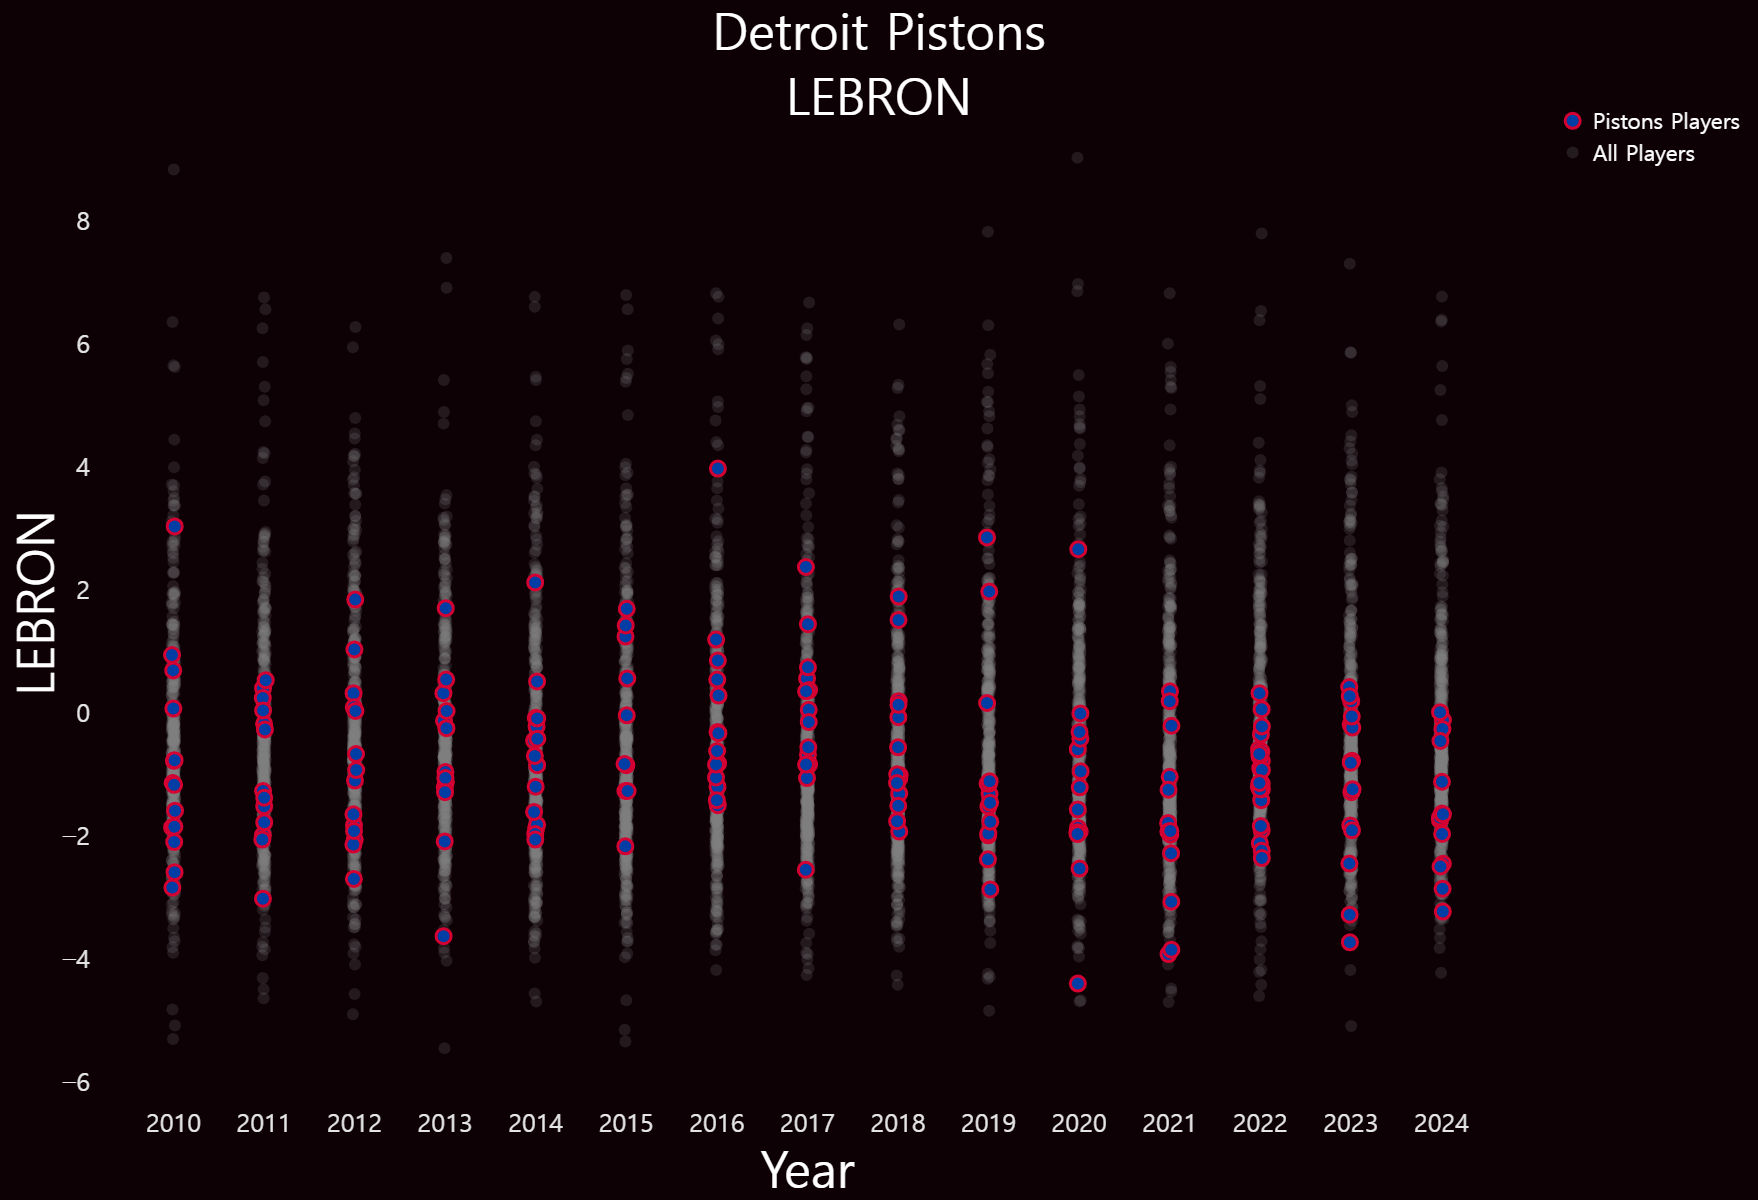

In [8]:
def get_colors():
    path = 'colors.json'
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)
    team_colors = {}
    for team in data:
        obj = data[team]
        color = obj['mainColor']
        color_hex = obj['colors'][color]['hex']
        team_colors[team]=color_hex
    team_colors['PHX']= '#e56020',
    second_colors = {}
    for team in data:
        obj = data[team]
        color = obj['secondaryColor']
        color_hex = obj['colors'][color]['hex']
        second_colors[team]=color_hex
    second_colors['PHX']= '#1d1160',

    temp = team_colors['BKN']

    team_colors['BKN'] = second_colors['BKN']
    second_colors['BKN'] = temp
    return team_colors,second_colors
def teambron_trend(team,graphtype='d', role = True):

    df = pd.read_csv('lebron.csv')
    jitter_strength = 0.02
    
    df['year_jitter'] = df['year'] + np.random.uniform(-jitter_strength, jitter_strength, len(df))
    
    old =df[df.year<2014].reset_index(drop=True)
    new= df[df.year>2013].reset_index(drop=True)
    old['Defensive Role'] = old['Pos']

    df = pd.concat([old,new]).reset_index(drop=True)
    team_colors,second_colors = get_colors()
    df['color'] = df['team'].map(team_colors)
    df['second_color'] = df['team'].map(second_colors)

    # Create the scatter plot
    fig = go.Figure()
    
    df['year'] =df['year'].astype(int)
    
    tdf = df[df.team.str.lower()==team].reset_index(drop=True)
    

    start_year = tdf['year'].min()
 
    end_year=tdf['year'].max()
    if graphtype =='d':
        unit = 'D-LEBRON'
        prole = 'Defensive Role'
    elif graphtype =='t':
        unit = 'LEBRON'
        prole = 'Pos'
        
    elif graphtype =='o':
        unit='O-LEBRON'
        prole = 'Offensive Archetype'
    
    df['color']='grey'
    df['second_color']='grey'

    # Add scatter points and lines connecting the points
    
    
    fig.add_trace(go.Scatter(
        x=df['year_jitter'],
        y=df[unit],
        mode='markers',
        name='All Players',
        line=dict(shape='linear'),
        marker_color = df['color'],
        marker_size=12,
        marker_opacity=.2,
        marker_line_color=df['second_color'],
        #marker_line_width=3
        
    ))
    fig.add_trace(go.Scatter(
        x=tdf['year_jitter'],
        y=tdf[unit],
        mode='markers',
         textposition = 'top center',
        text =tdf['Player'].str.title(),
        textfont =dict(color='white',family='Malgun Gothic',size=20),
        name=full_name(team).split(' ')[-1]+ ' Players',
        line=dict(shape='linear'),
        marker_color=tdf['color'],
        marker_line_color=tdf['second_color'],
        marker_size=15,
         marker_line_width=3,
    ))
    
    # Customize layout
    fig.update_layout(
        width=1800,
        height=1200,
        title=full_name(team) + '<br>'+unit,
        paper_bgcolor='#0d0106',
        plot_bgcolor='#0d0106',
                      
                   
                   
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
        title_x=.5,
        xaxis_title='Year',
        yaxis_title=unit,
        showlegend=True,
         legend={'traceorder':'reversed','font':dict(color='#FFFFFF', size=22,family="Malgun Gothic") },
    )
    
# Show the plot
    fig.update_yaxes(
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
    
    tickfont=dict(color='#e5e5e5', size=25,family="Malgun Gothic",) ,
        showgrid=False,zeroline=False
    )
    fig.update_xaxes(
        showgrid=False,
        title_font = dict(color='white', size=50,family="Malgun Gothic",) ,
        tickvals=[i for i in range(start_year,end_year+1)],
    
    tickfont=dict(color='#e5e5e5', size=25,family="Malgun Gothic",) 
    )
    return fig

fig = teambron_trend('det',graphtype='t',role=True)
fig.show()